# Linear Regression using Skikit-Learn

In [4]:
#pip uninstall scikit-learn
!pip install scikit-learn


In [9]:
# Linear Algebra and Data
import numpy as np
from lab_utils_multi import load_house_data

# Plots
import matplotlib.pyplot as plt
from lab_utils_common import dlc
import seaborn as sns
sns.set_style('darkgrid')

# Linear Regression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler



# Gradient Descent
Scikit-learn has a gradient descent regression model [sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#examples-using-sklearn-linear-model-sgdregressor).  Like your previous implementation of gradient descent, this model performs best with normalized inputs. [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) will perform z-score normalization as in a previous lab. Here it is referred to as 'standard score'.

### Load data, scale/normalize, create regression model:

In [19]:
y_train

array([300.   , 509.8  , 394.   , 540.   , 415.   , 230.   , 560.   ,
       294.   , 718.2  , 200.   , 302.   , 468.   , 374.2  , 388.   ,
       282.   , 311.8  , 401.   , 449.8  , 301.   , 502.   , 340.   ,
       400.282, 572.   , 264.   , 304.   , 298.   , 219.8  , 490.7  ,
       216.96 , 368.2  , 280.   , 526.87 , 237.   , 562.426, 369.8  ,
       460.   , 374.   , 390.   , 158.   , 426.   , 390.   , 277.774,
       216.96 , 425.8  , 504.   , 329.   , 464.   , 220.   , 358.   ,
       478.   , 334.   , 426.98 , 290.   , 463.   , 390.8  , 354.   ,
       350.   , 460.   , 237.   , 288.304, 282.   , 249.   , 304.   ,
       332.   , 351.8  , 310.   , 216.96 , 666.336, 330.   , 480.   ,
       330.3  , 348.   , 304.   , 384.   , 316.   , 430.4  , 450.   ,
       284.   , 275.   , 414.   , 258.   , 378.   , 350.   , 412.   ,
       373.   , 225.   , 390.   , 267.4  , 464.   , 174.   , 340.   ,
       430.   , 440.   , 216.   , 329.   , 388.   , 390.   , 356.   ,
       257.8  ])

In [10]:
# load the data
X_train, y_train = load_house_data()
X_features = ['size_sqft', 'bedrooms', 'floors', 'age']

In [11]:
# scale/normalize training data
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)

print(f'Peak to peak of X_train: {np.ptp(X_train, axis=0)}')
print(f'Peak to peak of X_norm: {np.ptp(X_norm, axis=0)}')

Peak to peak of X_train: [2.406e+03 4.000e+00 1.000e+00 9.500e+01]
Peak to peak of X_norm: [5.8452591  6.13529646 2.05626214 3.68533012]


In [12]:
# create the regression model
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)

print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

number of iterations completed: 131, number of weight updates: 12970.0


## Key Scikit Regression functions and methods

1. Z-score normalization
    - ```from sklearn.preprocessing import StandardScaler```
    - ```scaler = StandardScaler()```
    - ```X_normalized = scaler.fit_transform(X_train)```
2. Linear Regression
    - ```from sklearn.linear_model import SGDRegressor```
    - ```sgdr = SGDRegressor(max_iter=1000)```
    - ```sgdr.fit(X_norm. y_train)```
    - Number of iterations completed: ```sgdr.n_iter_```
    - Number of weight updates: ```sgdr.t_```
3. Retrieving Parameters
    - ```w_norm = sgdr.coef_```
    - ```b_norm = sgdr.intercept_```
4. Predict
    - ```y_pred_sgd = sgdr.predict(X_norm)```

### View parameters
Note, the parameters are associated with the *normalized* input data. The fit parameters are very close to those found in the previous lab with this data.

In [13]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_

print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

model parameters:                   w: [110.21614246 -21.10012042 -32.50979609 -38.01025295], b:[363.14651436]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


### Make predictions
Predict the targets of the training data. Use both the `predict` routine and compute using $w$ and $b$.

In [15]:
# comparing scikitlearn with actually writing out the formula - expect the same results

# make a prediction (hypothesized formula) using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)

# make a prediction using w and b
y_pred = np.dot(X_norm, w_norm) + b_norm

print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[295.18925044 485.88208385 389.57507193 492.04432003]
Target values 
[300.  509.8 394.  540. ]


### Plot Results
Let's plot the predictions versus the target values.

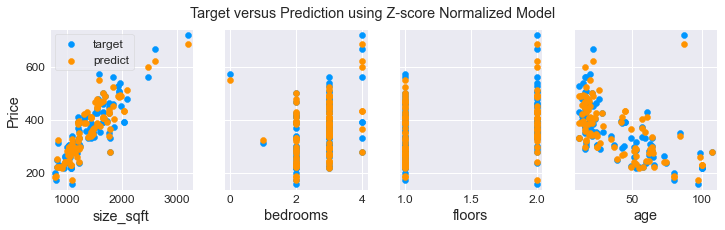

In [16]:
fig, ax = plt.subplots(1, 4, figsize=(12,3), sharey=True)

# look at the actual values/predictions by feature
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Price")
ax[0].legend()

fig.suptitle("Target versus Prediction using Z-score Normalized Model")

plt.show()
    